# Distribution of MSEs

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_total = pd.read_pickle('df_total.p')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


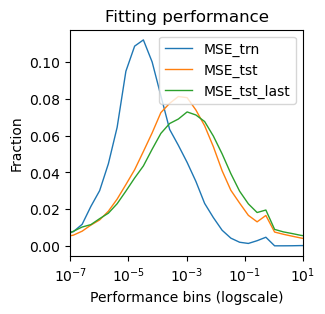

In [4]:
def plot_metric(series,my_metric,ls='-',lw=1):
    curbin = 0.0000000005
    binlist = [0]
    while curbin < 1000000:
        binlist.append(curbin)
        curbin *= 2
    [hist,edges] = np.histogram(series,bins=binlist)
    plt.plot(edges[:-1],hist/np.sum(hist),ls,label=my_metric,linewidth=lw)
    plt.xscale('log')

plt.figure(dpi=100,figsize=(3,3))    

plot_metric(df_total['MSE_trn'],'MSE_trn')
plot_metric(df_total['MSE_tst'],'MSE_tst')
plot_metric(df_total['MSE_tst_last'],'MSE_tst_last')

plt.xlabel('Performance bins (logscale)')
plt.ylabel('Fraction')
plt.legend()
plt.title('Fitting performance')
plt.xlim([1e-7,1e1])

plt.savefig('fitting_dist_new.png')
plt.savefig('fitting_dist_new.eps')

#plt.show()

In [5]:
def empirical_cdf(ax,series,my_metric,ls='-',label='',linewidth=1):
    a = series.values
    ax.plot(np.sort(a), np.linspace(0, 1, len(a), endpoint=False), ls,label=label,linewidth=linewidth)


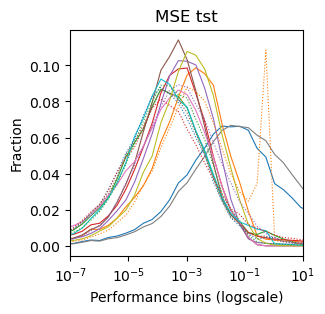

In [6]:
plt.figure(dpi=100,figsize=(3,3))    
ax = plt.subplot(111)

i = 0
for [curve_model, df_curve_model] in df_total.groupby('curve_model'):
    ls = '-'
    if i > 9:
        ls = ':'
    plot_metric(df_curve_model['MSE_tst'],curve_model,ls=ls,lw=0.8)
    #empirical_cdf(df_curve_model['MSE_tst'],curve_model,ls=ls,label=curve_model)
    i += 1

#box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    
plt.xlabel('Performance bins (logscale)')
plt.ylabel('Fraction')
#plt.legend()
plt.title('MSE tst')

plt.xscale('log')
plt.xlim([1e-7,1e1])

#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig('distribution_per_learner.png')
plt.savefig('distribution_per_learner.eps')
plt.show()

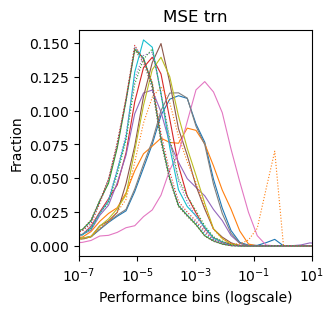

In [7]:
plt.figure(dpi=100,figsize=(3,3))    
ax = plt.subplot(111)

i = 0
for [curve_model, df_curve_model] in df_total.groupby('curve_model'):
    ls = '-'
    if i > 9:
        ls = ':'
    plot_metric(df_curve_model['MSE_trn'],curve_model,ls=ls,lw=0.8)
    #empirical_cdf(df_curve_model['MSE_tst'],curve_model,ls=ls,label=curve_model)
    i += 1

#box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    
plt.xlabel('Performance bins (logscale)')
plt.ylabel('Fraction')
#plt.legend()
plt.title('MSE trn')

plt.xscale('log')
plt.xlim([1e-7,1e1])

#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig('distribution_per_learner_trn.png')
plt.savefig('distribution_per_learner_trn.eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


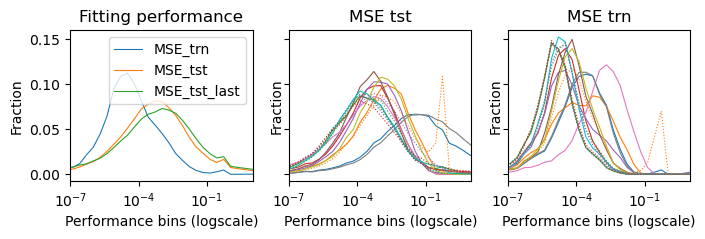

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, dpi=100, sharey=True, figsize=(8,2))

plt.sca(ax1) 

lw = 0.8

plot_metric(df_total['MSE_trn'],'MSE_trn',lw=lw)
plot_metric(df_total['MSE_tst'],'MSE_tst',lw=lw)
plot_metric(df_total['MSE_tst_last'],'MSE_tst_last',lw=lw)

plt.xlabel('Performance bins (logscale)')
plt.ylabel('Fraction')
plt.legend()
plt.title('Fitting performance')
plt.xlim([1e-7,1e1])

i = 0
for [curve_model, df_curve_model] in df_total.groupby('curve_model'):
    ls = '-'
    plt.sca(ax2) 
    if i > 9:
        ls = ':'
    plot_metric(df_curve_model['MSE_tst'],curve_model,ls=ls,lw=0.8)
    #empirical_cdf(df_curve_model['MSE_tst'],curve_model,ls=ls,label=curve_model)
    i += 1

#box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    
plt.xlabel('Performance bins (logscale)')
plt.ylabel('Fraction')
#plt.legend()
plt.title('MSE tst')

plt.xscale('log')
plt.xlim([1e-7,1e1])

#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

i = 0
for [curve_model, df_curve_model] in df_total.groupby('curve_model'):
    plt.sca(ax3) 
    ls = '-'
    if i > 9:
        ls = ':'
    plot_metric(df_curve_model['MSE_trn'],curve_model,ls=ls,lw=0.8)
    #empirical_cdf(df_curve_model['MSE_tst'],curve_model,ls=ls,label=curve_model)
    i += 1

#box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    
plt.xlabel('Performance bins (logscale)')
plt.ylabel('Fraction')
#plt.legend()
plt.title('MSE trn')

plt.xscale('log')
plt.xlim([1e-7,1e1])

#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig('alltogether.png',bbox_inches='tight')
plt.savefig('alltogether.eps',bbox_inches='tight')
plt.show()

C:\Users\tjviering\Anaconda3\envs\lcfit2\lib\site-packages\numpy\ma\core.py:6852: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


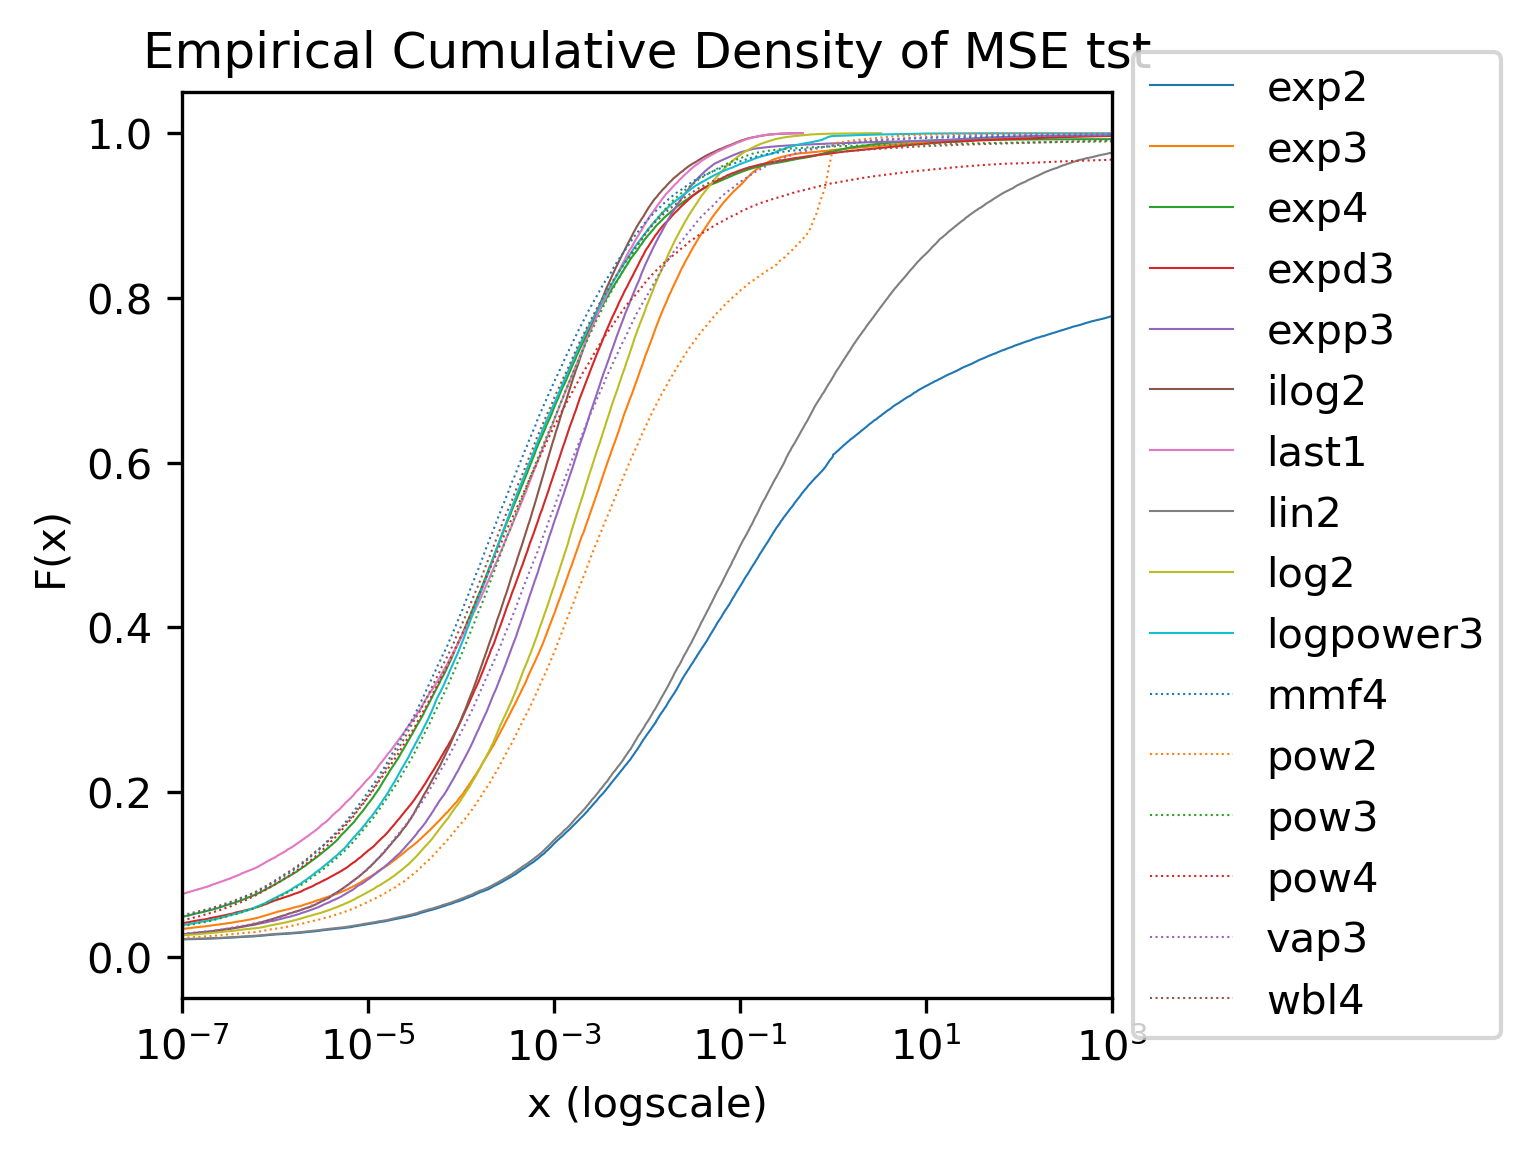

In [10]:
plt.figure(figsize=(5,4),dpi=300)
ax = plt.subplot(111)

i = 0
for [curve_model, df_curve_model] in df_total.groupby('curve_model'):
    ls = '-'
    if i > 9:
        ls = ':'
    #plot_metric(df_curve_model['MSE_tst'],curve_model,ls=ls)
    empirical_cdf(ax,df_curve_model['MSE_tst'],curve_model,ls=ls,label=curve_model, linewidth=0.5)
    i += 1

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    
plt.xlabel('x (logscale)')
plt.ylabel('F(x)')
plt.legend()
plt.title('Empirical Cumulative Density of MSE tst')

plt.xscale('log')
plt.xlim([1e-7,1e3])

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig('cdf_per_learner_MSE_tst.png')
plt.savefig('cdf_per_learner_MSE_tst.eps')

plt.show()

In [ ]:
df_curve_model

C:\Users\tjviering\Anaconda3\envs\lcfit2\lib\site-packages\numpy\ma\core.py:6852: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


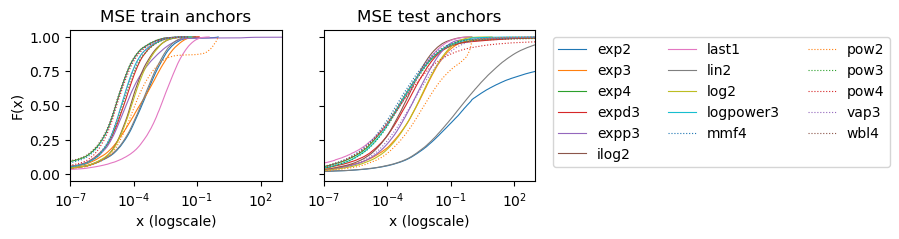

In [11]:
#plt.figure())
fig, (ax1, ax2) = plt.subplots(1, 2, dpi=100, sharey=True, figsize=(6,2))
#lt.figure(dpi=300)
#s = fig.add_gridspec(2, 2, hspace=0, wspace=0)
#ax1, ax2) = gs.subplots(sharey='row')

lw = 0.8

i = 0
for [curve_model, df_curve_model] in df_total.groupby('curve_model'):
    ls = '-'
    if i > 9:
        ls = ':'
    #plot_metric(df_curve_model['MSE_tst'],curve_model,ls=ls)
    empirical_cdf(ax1,df_curve_model['MSE_trn'],curve_model,ls=ls,label=curve_model, linewidth=lw)
    i += 1

    plt.sca(ax1) 
    plt.xlabel('x (logscale)')
    plt.xscale('log')
    plt.xlim([1e-7,1e3])
    plt.ylabel('F(x)')
    plt.title('MSE train anchors')

    
i = 0
for [curve_model, df_curve_model] in df_total.groupby('curve_model'):
    ls = '-'
    if i > 9:
        ls = ':'
    #plot_metric(df_curve_model['MSE_tst'],curve_model,ls=ls)
    empirical_cdf(ax2,df_curve_model['MSE_tst_last'],curve_model,ls=ls,label=curve_model, linewidth=lw)
    i += 1
    
    plt.sca(ax2) 
    plt.xlabel('x (logscale)')
    plt.title('MSE test anchors')
    #plt.ylabel('F(x)')

box = ax.get_position()
#ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])
#ax2.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# 
plt.legend(ncol=3, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xscale('log')
plt.xlim([1e-7,1e3])

#ax.legend()
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig('cdf_per_learner_trn_tst_beauty.png',bbox_inches='tight')
plt.savefig('cdf_per_learner_trn_tst_beauty.eps',bbox_inches='tight')

plt.show()

C:\Users\tjviering\Anaconda3\envs\lcfit2\lib\site-packages\numpy\ma\core.py:6852: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


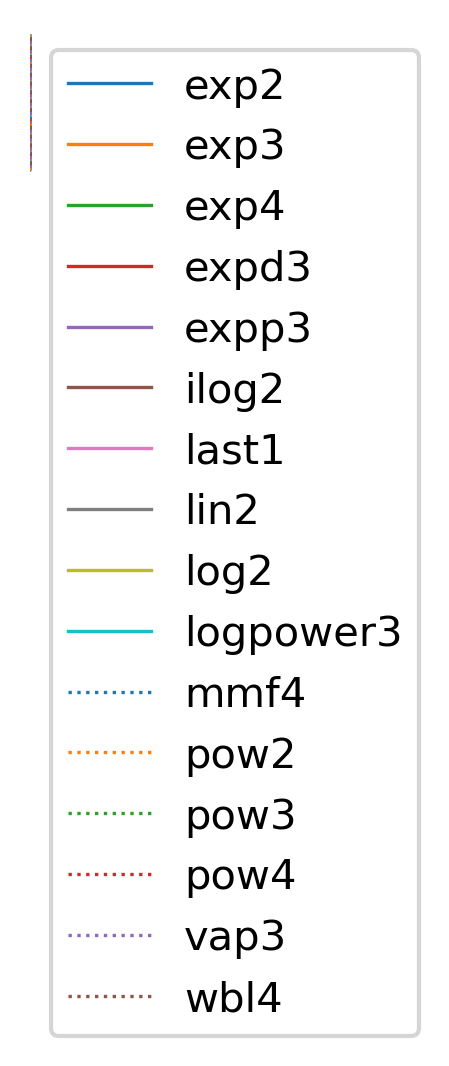

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, dpi=300, sharey=True)
#lt.figure(dpi=300)
#s = fig.add_gridspec(2, 2, hspace=0, wspace=0)
#ax1, ax2) = gs.subplots(sharey='row')

lw = 0.8

i = 0
for [curve_model, df_curve_model] in df_total.groupby('curve_model'):
    ls = '-'
    if i > 9:
        ls = ':'
    #plot_metric(df_curve_model['MSE_tst'],curve_model,ls=ls)
    empirical_cdf(ax1,df_curve_model['MSE_trn'],curve_model,ls=ls,label=curve_model, linewidth=lw)
    i += 1

    plt.sca(ax1) 
    plt.xlabel('x (logscale)')
    plt.xscale('log')
    plt.xlim([1e-7,1e3])
    plt.ylabel('F(x)')
    #plt.title('MSE train anchors')
    plt.axis('off')


    
i = 0
for [curve_model, df_curve_model] in df_total.groupby('curve_model'):
    ls = '-'
    if i > 9:
        ls = ':'
    #plot_metric(df_curve_model['MSE_tst'],curve_model,ls=ls)
    empirical_cdf(ax2,df_curve_model['MSE_tst_last'],curve_model,ls=ls,label=curve_model, linewidth=lw)
    i += 1
    
    plt.sca(ax2) 
    plt.xlabel('x (logscale)')
    #plt.title('MSE test anchors')
    plt.axis('off')

    #plt.ylabel('F(x)')

box = ax.get_position()
ax1.set_position([box.x0, box.y0, box.x0*0.01, box.y0])
ax2.set_position([box.x0, box.y0, box.y0*0.01, box.y0])

plt.legend()

plt.xscale('log')
plt.xlim([1e-7,1e3])

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig('cdf_per_learner_trn_tst_legend.png',bbox_inches='tight')
plt.savefig('cdf_per_learner_trn_tst_legend.eps',bbox_inches='tight')

plt.show()

In [ ]:
plt.figure(figsize=(16,4),dpi=100)
ax = plt.subplot(111)

i = 0
for [n, df_n] in df_total.groupby('n'):
    ls = '-'
    plot_metric(df_n['MSE_tst'],str(n),ls=ls)
    i += 1

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    
plt.xlabel('performance bins (logscale)')
plt.ylabel('fraction')
plt.legend()
plt.title('fitting performance MSE tst')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [ ]:
df_clean['n'].unique()